In [ ]:
## this makes figure 10 and 11 of the LVDB overview paper 

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table
import numpy.ma as ma

In [3]:
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## loads lasted versions from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
dsph_lf_distant = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field_distant.csv')
gc_ambiguous = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ambiguous.csv')
gc_mw_new = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_mw_new.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')

In [5]:
## loads lasted versions from github
dsph_mw = table.Table.read('../data/dwarf_mw.csv')
dsph_m31 = table.Table.read('../data/dwarf_m31.csv')
dsph_lf = table.Table.read('../data/dwarf_local_field.csv')
dsph_lf_distant = table.Table.read('../data/dwarf_local_field_distant.csv')
gc_ambiguous = table.Table.read('../data/gc_ambiguous.csv')
gc_mw_new = table.Table.read('../data/gc_mw_new.csv')
gc_harris = table.Table.read('../data/gc_harris.csv')

In [6]:
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = '#9EDAE5' #'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

label_dsph_mw = r'${\rm Dwarf~MW}$'
label_dsph_m31 = r'${\rm Dwarf~M31}$'
label_dsph_lf = r'${\rm Dwarf~LF}$'
label_dsph_lf_distant = r'${\rm Dwarf~LV}$'
label_gc_ufcss = r'${\rm Ambiguous/HFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Bulge/Disk/Halo}$'

In [7]:
## M_V -> L_V
def lum(m_x, m_x_sun=4.83):
    return pow(10., -0.4*(m_x - m_x_sun) )

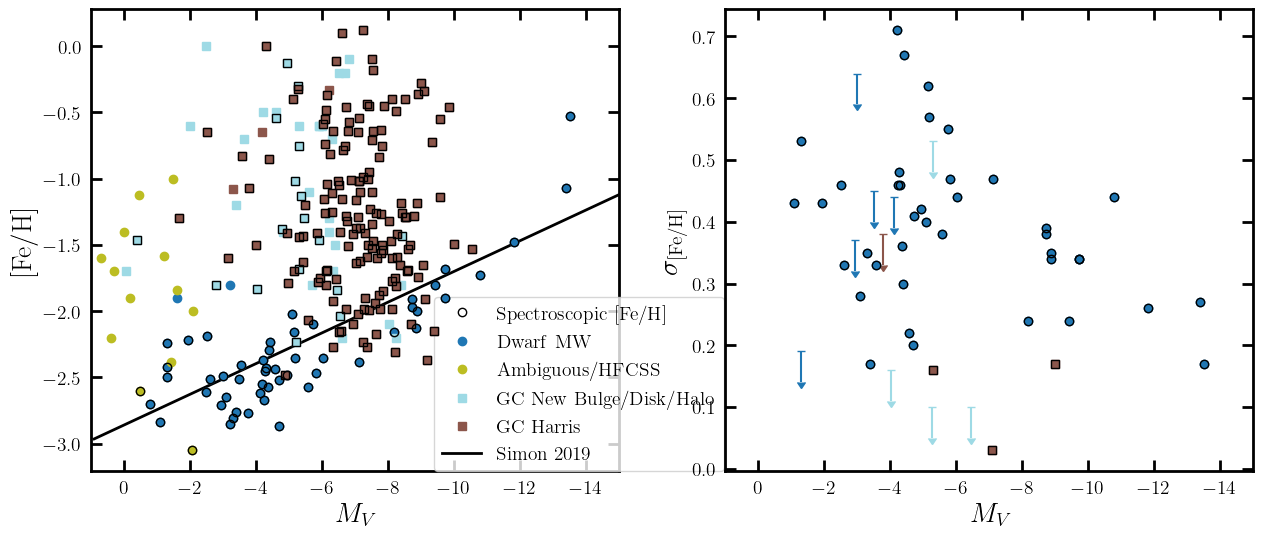

In [8]:
## figure 10

fig, ax = plt.subplots(1,2, figsize=(12+3, 6))
## stellar mass/luminosity - stellar metallicity 

## for the legend
ax[0].plot([], [], 'o', mfc='None', mec='k', lw=3, zorder=1000, label=r'${\rm Spectroscopic~[Fe/H]}$')

for obj, color, label, marker in zip([dsph_mw,  gc_ambiguous, gc_mw_new, gc_harris], [color_dsph_mw, color_gc_ufcss,color_gc_disk,color_gc_harris ], [label_dsph_mw, label_gc_ufcss, label_gc_disk, label_gc_harris], ['o', 'o', 's', 's']):
    ax[0].plot(obj['M_V'], obj['metallicity'], marker, c=color, lw=3, zorder=500,label=label)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[0].plot(obj2['M_V'], obj2['metallicity'], marker, mfc='None', mec='k', lw=2, zorder=1000)
    
    ax[1].plot(obj['M_V'], obj['metallicity_spectroscopic_sigma'], marker, c=color, lw=2, zorder=500)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[1].plot(obj2['M_V'], obj2['metallicity_spectroscopic_sigma'], marker, mfc='None', mec='k', lw=2, zorder=1000)
    ax[1].errorbar(obj2['M_V'], obj2['metallicity_spectroscopic_sigma_ul'], fmt='_',yerr=.05, uplims=True, c=color, )
ax[0].invert_xaxis()
ax[0].set_ylabel(r'${\rm [Fe/H]}$')

## luminoisty-metallicity relation from Simon 2019
## https://ui.adsabs.harvard.edu/abs/2019ARA%26A..57..375S/abstract
x = np.arange( -20,1, .1)
ax[0].plot(x,-1.68 + 0.29 * np.log10(lum(x)/1e6), c='k', lw=2, label=r'${\rm Simon~2019}$', zorder=1)

ax[0].set_xlabel(r'$M_V$')
ax[1].set_xlabel(r'$M_V$')
ax[0].set_xlim(1, -15)
ax[1].set_xlim(1, -15)
ax[1].set_ylabel(r'$\sigma_{\rm [Fe/H]}$')
ax[0].legend(loc=(.65, 0),)

# plt.tight_layout() 
plt.savefig('metallicity_overview_mw.pdf')
plt.show()

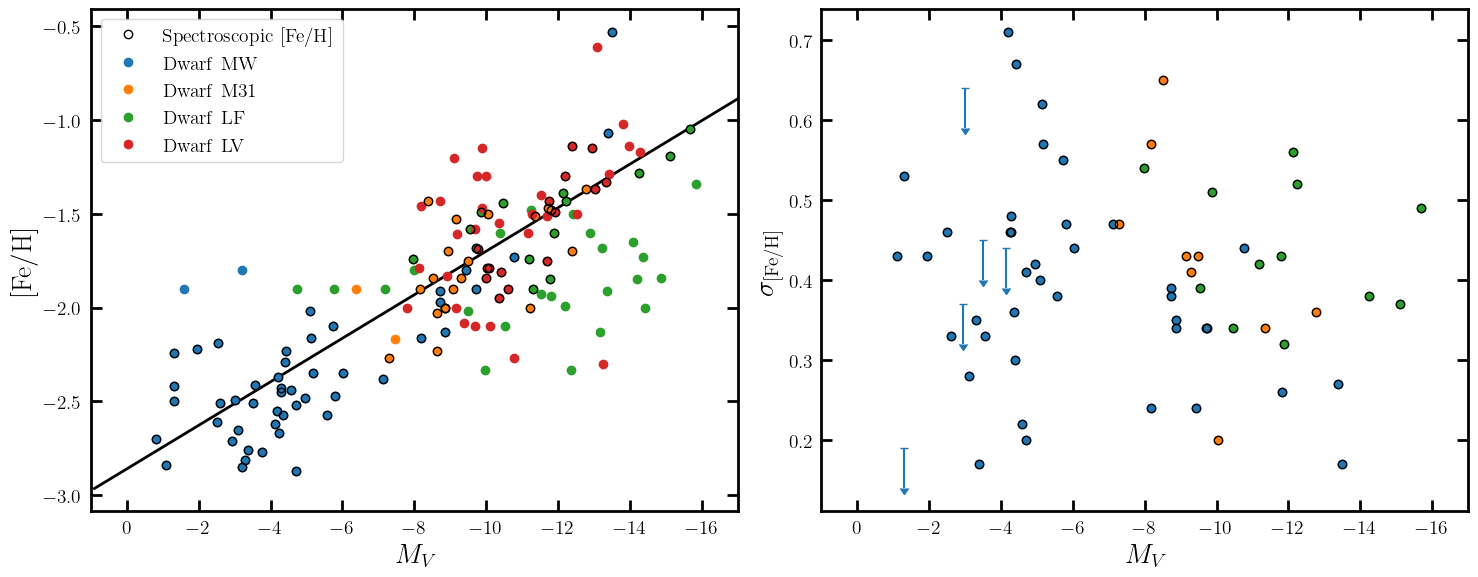

In [9]:
## figure 11
fig, ax = plt.subplots(1,2, figsize=(12+3, 6))
## mass/luminosity- metallicity 

ax[0].plot([], [], 'o', mfc='None', mec='k', lw=3, zorder=1000, label=r'${\rm Spectroscopic~[Fe/H]}$')
for obj, color, label  in zip([dsph_mw,  dsph_m31, dsph_lf, dsph_lf_distant], [color_dsph_mw, color_dsph_m31,color_dsph_lf,color_dsph_lf_distant ], [label_dsph_mw, label_dsph_m31, label_dsph_lf, label_dsph_lf_distant]):
    ax[0].plot(obj['M_V'], obj['metallicity'], 'o', c=color, lw=2, zorder=500, label=label)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[0].plot(obj2['M_V'], obj2['metallicity'], 'o', mfc='None', mec='k', lw=2, zorder=1000)
    
    ax[1].plot(obj['M_V'], obj['metallicity_spectroscopic_sigma'], 'o', c=color, lw=3, zorder=500)
    obj2= obj[obj['metallicity_type']=='spectroscopic']
    ax[1].plot(obj2['M_V'], obj2['metallicity_spectroscopic_sigma'], 'o', mfc='None', mec='k', lw=2, zorder=1000)
    ax[1].errorbar(obj2['M_V'], obj2['metallicity_spectroscopic_sigma_ul'], fmt='_',yerr=.05, uplims=True, c=color, )
ax[0].invert_xaxis()
ax[0].set_ylabel(r'${\rm [Fe/H]}$')

ax[0].legend(loc=2)
## luminoisty-metallicity relation from Simon 2019
## https://ui.adsabs.harvard.edu/abs/2019ARA%26A..57..375S/abstract
x = np.arange( -20,1, .1)
ax[0].plot(x,-1.68 + 0.29 * np.log10(lum(x)/1e6), c='k', lw=2, label=r'${\rm Simon~2019}$', zorder=1)
ax[0].set_xlabel(r'$M_V$')
ax[1].set_xlabel(r'$M_V$')
# ax[0].legend(loc=(1,0))
ax[0].set_xlim(1, -17)
ax[1].set_xlim(1, -17)
ax[1].set_ylabel(r'$\sigma_{\rm [Fe/H]}$')

plt.tight_layout()
plt.savefig('metallicity_overview_dwarf.pdf')
plt.show()